**Leonardo Mendes de Moraes 2C** </p>
PERGUNTA:Países com uma grande área e uma grande população tendem a ter um IDH menor?
<p> O senso comum nos leva a crer que um país populoso e extenso tende a ter um IDH menor devido a inúmeras dificuldades seja de infraestrutura, logística entre outras. Mas será que na vida real essa correlação realmente exite?

In [19]:

#imports
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#lendo os excels
idh = pd.read_excel("hdi_human_development_index.xlsx")
pop = pd.read_excel("population_total.xlsx")
area = pd.read_excel("surface_area_sq_km.xlsx")

In [21]:
idh_2010 = idh.loc[:, ["Paises", 2010]]
pop_2010 = pop.loc[:, ["Paises", 2010]]
area_2010 = area.loc[:, ["Paises", 2010]]

In [22]:
#settando o índice
idh_idx = idh_2010.set_index('Paises') 
pop_idx = pop_2010.set_index('Paises')
area_idx = area_2010.set_index('Paises')


In [23]:
#juntando os dataframes
df = idh_idx.join(pop_idx, how='inner', lsuffix='_idh', rsuffix='_pop')
data = df.join(area_idx, how="inner")

data.rename(columns={data.columns[2]:'2010_area'}, inplace=True)

In [24]:
data

,2010_idh,2010_pop,2010_area
Paises,,,
Afghanistan,0.454,28800000,653000.0
Albania,0.738,2940000,28800.0
Algeria,0.724,36100000,2380000.0
Andorra,0.819,84400,470.0
Angola,0.495,23400000,1250000.0
Antigua and Barbuda,0.782,94700,440.0
Argentina,0.816,41200000,2780000.0
Armenia,0.729,2880000,29700.0
Australia,0.927,22100000,7740000.0


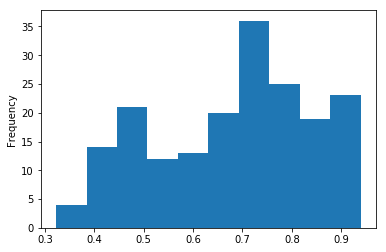

In [25]:
data["2010_idh"].plot.hist()


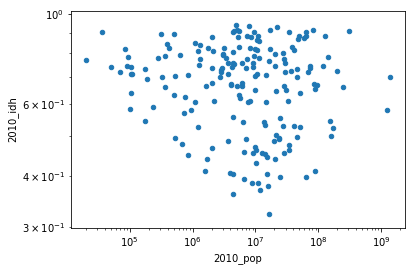

In [26]:
df.plot.scatter(x="2010_pop", y =  "2010_idh", loglog=True)

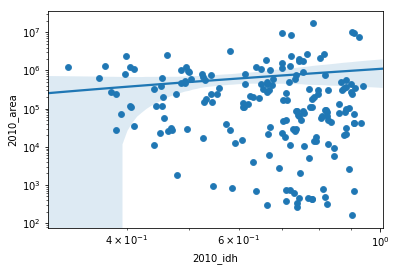

In [27]:
df2 = idh_idx.join(area_idx, how='inner', lsuffix='_idh', rsuffix='_area')
df2.plot.scatter(x="2010_idh", y =  "2010_area", loglog=True)
sns.regplot(x="2010_idh", y =  "2010_area", data = df2)

In [28]:
def reta(dados_x, dados_y, nome_x = "Eixo X", nome_y = "Eixo Y"):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre ',nome_x,'  e ',nome_y,':')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)

    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title(nome_x + " versus "+ nome_y)
    plt.xlabel(nome_x)
    plt.ylabel(nome_y)

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')

    plt.tight_layout()
    plt.show()

Ajuste linear entre  Eixo X   e  Eixo Y :
Coeficiente linear: 0.8013484680247386
Coeficiente angular: -0.007850739739943973


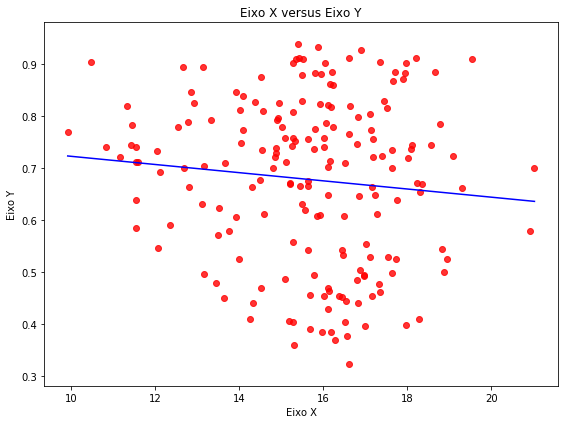

In [34]:
data["2010_pop_log"] = np.log(data["2010_pop"])

reta( data["2010_pop_log"] , data["2010_idh"], )


Ajuste linear entre  Eixo X   e  Eixo Y :
Coeficiente linear: 0.7939864428994419
Coeficiente angular: -0.010079416819175277


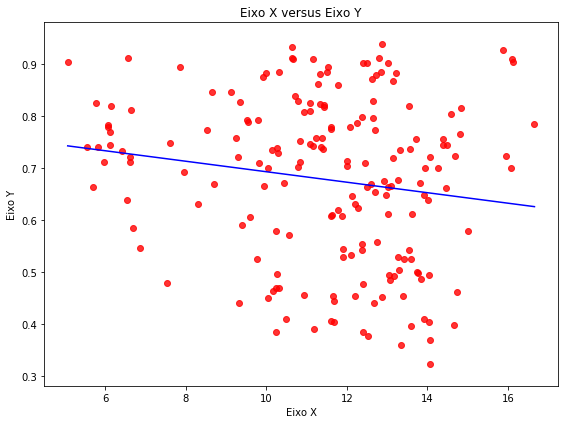

In [35]:
data["2010_area_log"] = np.log(data["2010_area"])

reta( data["2010_area_log"] , data["2010_idh"], )

In [37]:
data.corr()

,2010_idh,2010_pop,2010_area,2010_pop_log,2010_area_log
2010_idh,1.000000,-0.013794,0.097319,-0.101856,-0.160559
2010_pop,-0.013794,1.000000,0.451613,0.450341,0.310387
2010_area,0.097319,0.451613,1.000000,0.412880,0.506120
2010_pop_log,-0.101856,0.450341,0.412880,1.000000,0.838008
2010_area_log,-0.160559,0.310387,0.506120,0.838008,1.000000
